In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and list sheet names
file_path = "Specialist_Interview_Data_052125.xlsx"
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

['Teacher_Satisfaction_Data', 'Codebook']

In [10]:
df = xls.parse('Teacher_Satisfaction_Data')

# Display the first few rows to inspect the structure
df.head()

,response_id,respect_adults,resources_pd,respect_admin,comfortable_concerns,respect_students,safe_school,teachers_trusted,overall_good
0,1,Agree,Disagree,Strongly Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Agree
1,2,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Agree,Disagree,Agree
2,3,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree
3,4,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Disagree
4,5,Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree


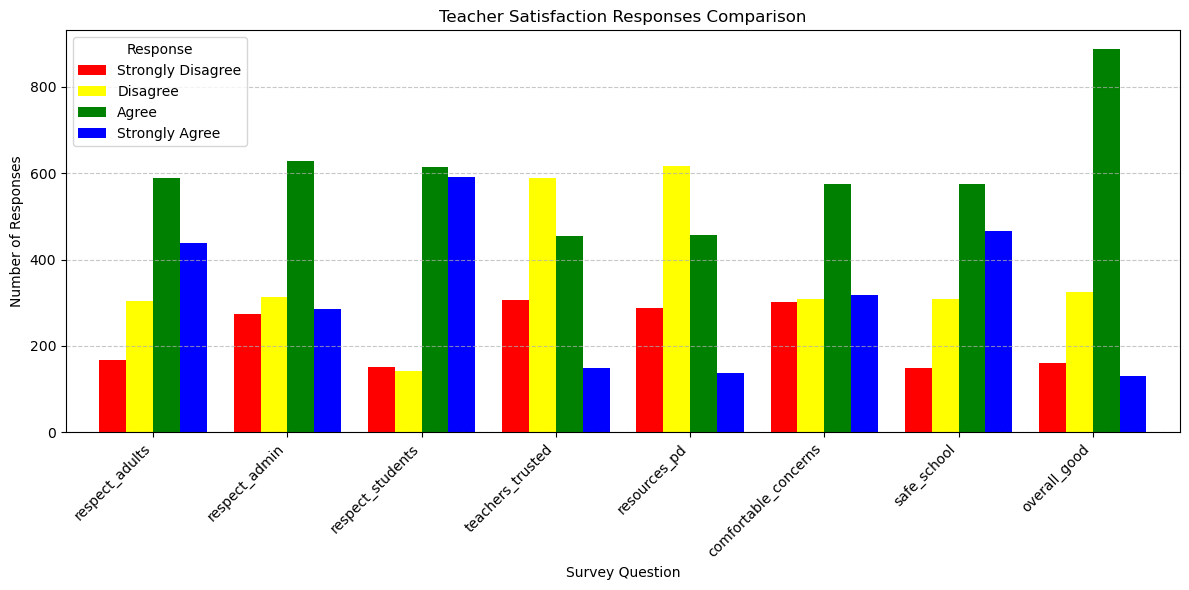

In [18]:
# Select a few key columns for comparison
columns_to_compare = [
    'respect_adults', 
    'respect_admin', 
    'respect_students', 
    'teachers_trusted',
    'resources_pd',
    'comfortable_concerns',
    'safe_school', 
    'overall_good'
]

# Create a frequency table for each column
response_categories = ['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']
response_counts = pd.DataFrame(index=response_categories)

for column in columns_to_compare:
    response_counts[column] = df[column].value_counts().reindex(response_categories, fill_value=0)

# Transpose for plotting
response_counts = response_counts.T
custom_colors = ['red', 'yellow', 'green', 'blue']
# Plot a multi-bar chart
ax = response_counts.plot(kind='bar', figsize=(12, 6), width=0.8,color=custom_colors)
plt.title('Teacher Satisfaction Responses Comparison')
plt.ylabel('Number of Responses')
plt.xlabel('Survey Question')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Response')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()